とりあえずデータの確認
passengerID      :乗客ID
survival            :生死(0=No;1=Yes)
pclass             :乗客の社会階級(1=1st(High),2=2nd(Middle),3=3rd(Low))
name              :Name
sex                 :性別
age                :年齢
sibsp              :乗船している夫婦、兄弟姉妹の数
parch              :乗船している親、子供の数
ticket              :チケットNo
fare                :乗船料金
cabin              :船室
embarked        :乗船場所(C=Cherbourg;Q=Queenstow;S=Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#データの読み込み
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [3]:
#とりあえずデータを見てみる
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


sexとembarkedは名義特徴量だからOne-Hotエンコーディングをする

In [4]:
#pandasでone-hotエンコーディングを使い、ダミー変数を作成
sex_dm = pd.get_dummies(train['Sex'])
embarked_dm = pd.get_dummies(train['Embarked'])

In [5]:
#とりあえずデータをみる
sex_dm

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [6]:
embarked_dm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
#元のデータに連結する（その際、元となったデータは消す）
train = pd.concat((train,sex_dm),axis=1)
train = train.drop('Sex',axis=1)
train = train.drop('female',axis=1)
#sexはmaleの0,1で判断できるので、femaleは消す

train = pd.concat((train,embarked_dm),axis=1)
train = train.drop('Embarked',axis=1)

あとは、Name,Ticket,Cabinがまだ数値化されていないので、数値化を考える

In [9]:
#まずは、データの欠損値について確認しておく
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
male             0
C                0
Q                0
S                0
dtype: int64

891中の687の欠損はデカすぎるので、今回は除外する

In [10]:
#とりあえず、一度欠損データなしの相関係数を見てみる
train = train.drop('Name',axis=1)
train = train.drop('Ticket',axis=1)
train = train.drop('Cabin',axis=1)

In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


相関が高い順では、male,Pclass,Fare,C,Sで残りは0.1よりも小さい相関だからまあまあ無視

欠損値処理で悩んでいたAgeは相関係数-0.077221と1にも満たしていないので、欠損値の処理は考えないで飛ばしていいだろう

In [12]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1
5,6,0,3,NaN,0,0,8.4583,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,1,0,0


In [26]:
#使えるのはmaleとPclassとFareくらいか、、、、
X_1 = train.loc[:,['male','Pclass','Fare']]
y_1 = train.loc[:,['Survived']]
X_1
y_1

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [27]:
#　データの標準化
X_1 = np.array(X_1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

ValueError: x and y must be the same size

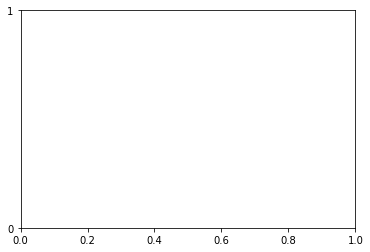

In [29]:
#散布図を出力
plt.scatter(X_1,y_1,color='red',marker='s')